In [3]:
# Import Block
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # type: ignore
#Import matplotlib to graph values generated from corpus sentiments
import matplotlib.pyplot as plt # type: ignore
import re
import numpy as np # type: ignore
import pandas as pd # type: ignore
from nltk.tokenize import sent_tokenize, word_tokenize # type: ignore
from gensim.models import Word2Vec # type: ignore
from sklearn.decomposition import PCA # type: ignore

# My usual preferences
plt.rcParams['figure.dpi'] = 1000
plt.rcParams["figure.figsize"] = (10,5)

In [4]:
# Function that reads through corpus and assigns weights to each sentence
def read_file(file):
    sentences = []
# Strip through the sentences of the corpus, and append each to the sentence
    with open(file,mode ='r',encoding ="utf-8") as file:
        for line in file:
            if line := line.strip():
                sentences.append(line)
    return sentences
# Sentences will consist of the sentences of the read file at different indices
sentences = read_file(filename)

In [5]:
#Function to read tokenized words of the corpus
def read_words(file):
    words = []
    with open(file,mode='r',encoding = 'utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                line_words = line.split()
                words.extend(line_words)
    return words

In [15]:
# Select corpus as filename
filename = "1DOOM.txt"
#Function to analyze the sentences
analyzer = SentimentIntensityAnalyzer()
# Allows user to compare sentiment polarity
score = input("Enter a positive or negative float between -1 and 1: ")
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    if(vs["compound"] >= float(score) ):
        print("{:-<65} {}".format(sentence,str(vs["compound"])))


The last thing to fit was the mask------------------------------- 0.3612
Will it conform to my twisted features in comfort---------------- 0.3612
Last seen pulling chicks like a fiend pull a fast one------------ 0.3612
Can't put shit past him------------------------------------------ 0.4449
Stand close to his main man like a chain gang-------------------- 0.3612
That's no mystery that Hardy Boys do with Nancy Drew------------- 0.128
The extorter bring slaughter like "Well I oughta"---------------- 0.5574
I suggest you hand over the formula doula------------------------ 0.4939
Hard hitting like puffing a woola with Lieutenant Uhura---------- 0.2732
Every day feel like it's an off day with Ferris Bueller---------- 0.3612
Twist that wig like a muppet, keep it simple, can't truss it----- 0.3612
Drink Jack, kick back, drop jewel, finish what I start----------- 0.1027
Only we save we-------------------------------------------------- 0.4939
By candlelight my hand will write these rhymes 'til 

In [16]:
#Creates a distinct list that checks the values of the compounds(positive or negative value)
sentiment = []
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    sentiment.append(vs["compound"])

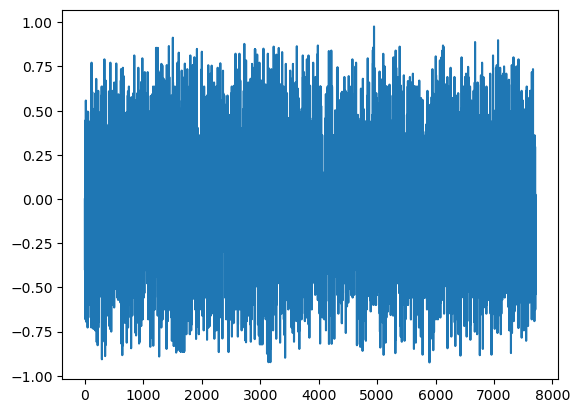

In [12]:
#Plot the given sentiments on a plane
plt.plot(sentiment)

In [20]:
#Calls read_words to print all compound values not equal to 0
words = read_words(filename)
count = 0
analyzer = SentimentIntensityAnalyzer()
for word in words:
    vs = analyzer.polarity_scores(word)
    count+=1
    if vs["compound"] != 0:
        print("{:-<65} {}".format(word,str(vs["compound"])))
#Counts the total amount of words in the words list
print(f"({count}) Polarized Word Count: {(len(words))}")

Doom:]----------------------------------------------------------- -0.4019
dreaded---------------------------------------------------------- -0.5719
fit-------------------------------------------------------------- 0.3612
comfort---------------------------------------------------------- 0.3612
Doom:]----------------------------------------------------------- -0.4019
like------------------------------------------------------------- 0.3612
shit------------------------------------------------------------- -0.5574
niggas----------------------------------------------------------- -0.34
mad-------------------------------------------------------------- -0.4939
Retarded--------------------------------------------------------- -0.5719
like------------------------------------------------------------- 0.3612
fuck------------------------------------------------------------- -0.5423
no--------------------------------------------------------------- -0.296
Hardy----------------------------------------

In [14]:
# Read the corpus file and split it into sentences
with open("1Doom.txt", "r", encoding="utf-8") as file:
    corpus_text = file.read()

# Split the corpus into sentences
sentences = corpus_text.split('\n')

# Split each sentence into words
sentences = [sentence.split() for sentence in sentences if sentence]  # Filter out empty sentences

# Print the resulting list of sentences
print(sentences)


[['File:', '520102.html'], ['[Dr.', 'Doom:]'], ['My', 'servants', 'began', 'to', 'forge', 'what', 'was', 'to', 'become'], ['The', 'most', 'dreaded', 'costume', 'on', 'the', 'face', 'of', 'the', 'earth'], ['The', 'last', 'thing', 'to', 'fit', 'was', 'the', 'mask'], ['Will', 'it', 'conform', 'to', 'my', 'twisted', 'features', 'in', 'comfort'], ['[MF', 'Doom:]'], ['He', 'cleans', 'his', 'metal', 'mask', 'with', 'gasoline,', 'they', 'after', 'him'], ['Last', 'seen', 'pulling', 'chicks', 'like', 'a', 'fiend', 'pull', 'a', 'fast', 'one'], ["Can't", 'put', 'shit', 'past', 'him'], ['Got', 'niggas', 'on', 'his', 'own', 'team', 'mad', 'enough', 'to', 'blast', 'him'], ['Retarded', 'in', 'real', 'life,', 'on', 'the', 'mic', 'Rain', 'Man'], ['Stand', 'close', 'to', 'his', 'main', 'man', 'like', 'a', 'chain', 'gang'], ['Who', 'give', 'a', 'fuck', 'about', 'who', 'or', 'they', 'fancy', 'crew'], ["That's", 'no', 'mystery', 'that', 'Hardy', 'Boys', 'do', 'with', 'Nancy', 'Drew'], ['Sorta', 'with', 'her

In [15]:
model = Word2Vec(sentences=sentences, 
                 window = 2, 
                 min_count=1, 
                 vector_size = 5)


print(model)
print(model.wv.get_normed_vectors().shape)
print(f"Vector:  {model.wv['servants']}")
print(f"Similar: {model.wv.most_similar('chocolate')}")
model.wv.key_to_index


Word2Vec<vocab=13787, vector_size=5, alpha=0.025>
(13787, 5)
Vector:  [ 0.12748359  0.13140412 -0.14303386 -0.15515703 -0.15443107]
Similar: [('sandals', 0.9961416721343994), ('lecture', 0.9950097799301147), ('surgical', 0.9947779774665833), ('breadwinner', 0.9927284717559814), ('shred', 0.9915813207626343), ("trappin'", 0.9904736876487732), ('(Hey,', 0.9896619319915771), ('bawling', 0.986147403717041), ('kicking', 0.9860225319862366), ('doze', 0.9856832027435303)]


{'the': 0,
 'a': 1,
 'to': 2,
 'and': 3,
 'I': 4,
 'you': 5,
 'of': 6,
 'in': 7,
 'like': 8,
 'it': 9,
 'with': 10,
 'on': 11,
 'is': 12,
 'for': 13,
 'he': 14,
 'your': 15,
 'get': 16,
 'And': 17,
 'that': 18,
 'they': 19,
 'my': 20,
 'me': 21,
 "I'm": 22,
 'be': 23,
 'was': 24,
 'his': 25,
 'up': 26,
 'The': 27,
 'no': 28,
 'out': 29,
 'all': 30,
 'got': 31,
 "it's": 32,
 'from': 33,
 'know': 34,
 "don't": 35,
 'this': 36,
 'her': 37,
 'when': 38,
 'who': 39,
 'off': 40,
 'we': 41,
 'what': 42,
 'just': 43,
 'He': 44,
 'as': 45,
 'so': 46,
 'or': 47,
 'not': 48,
 "It's": 49,
 'File:': 50,
 "'em": 51,
 'You': 52,
 'him': 53,
 'do': 54,
 'but': 55,
 'back': 56,
 'she': 57,
 'how': 58,
 'at': 59,
 'more': 60,
 'than': 61,
 'some': 62,
 'A': 63,
 'could': 64,
 'go': 65,
 "that's": 66,
 "ain't": 67,
 'ya': 68,
 'time': 69,
 'one': 70,
 'see': 71,
 'if': 72,
 'have': 73,
 'need': 74,
 'them': 75,
 'man': 76,
 'by': 77,
 'But': 78,
 'They': 79,
 'too': 80,
 'shit': 81,
 'right': 82,
 'make'

In [16]:
X = model.wv.get_normed_vectors()
pca = PCA(n_components=2)
result = pca.fit_transform(X)

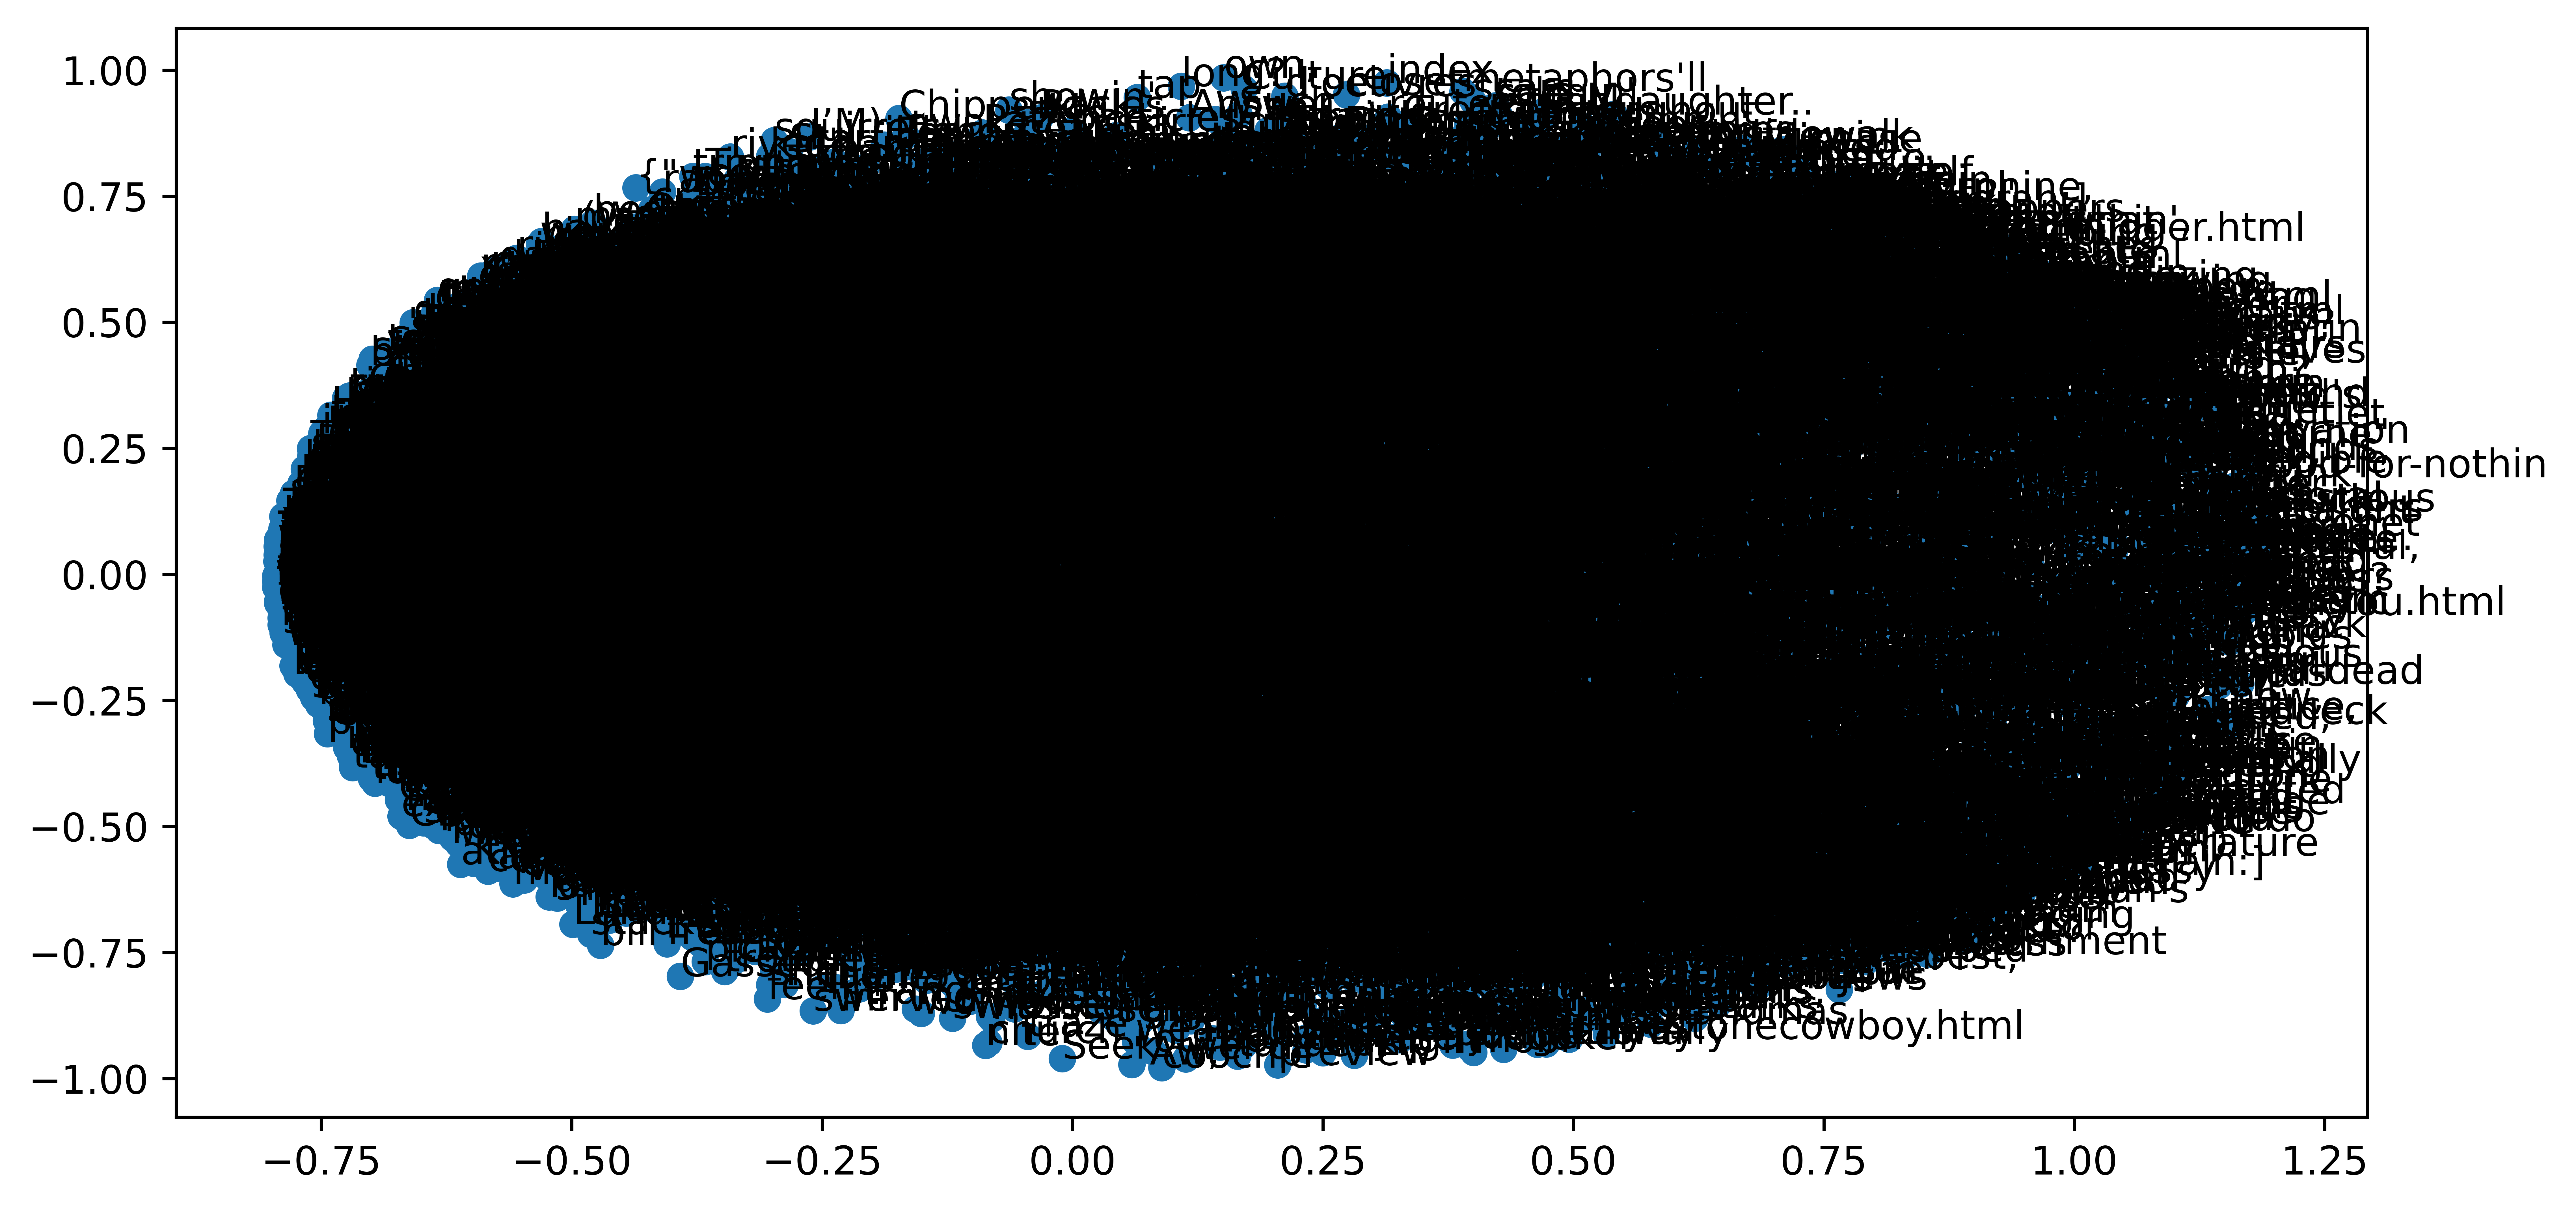

In [17]:
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.index_to_key)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [ ]:
df = pd.DataFrame(model.wv.get_normed_vectors())
df['word'] = words
df.set_index('word', inplace = True)
df.head(10)

In [ ]:
# DATA
with open("1Doom.txt", "r", encoding = 'utf-8') as f:
    gabs = f.readlines()

gab_text = ". ".join(gabs)
data = []
for sentence in sent_tokenize(gab_text):
    temp = []
    for word in word_tokenize(sentence):
        temp.append(word.lower())
    data.append(temp)

# How many "sentences" do we have?
print(len(data))